In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


HOMEWORK Questions

Q1. How is the distribution of the sale price?

Q2. Develop a linear regression model for predicting the sale price in terms of the house features, leaving aside the zipcode.

Q3. Plot the actual price versus the price predicted by the model. What do you see?

Q4. Add a dummy for every zipcode to the feature collection and run the analysis again. Is this better?

Q5. Train a **decision tree model**, a **random forest model** and a **gradient boosting model**. What is the difference?

Q6. Validate the two most promising models, among those trained, using on a **train-test split**.



In [33]:
#import pandas and dataset
import pandas as pd 
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path+'king.csv', index_col=0)

In [34]:
#explore data
df.info()

<class 'pandas.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  str    
 1   zipcode        21613 non-null  int64  
 2   lat            21613 non-null  float64
 3   long           21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_above     21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  price          21613 non-null  int64  
dtypes: float64(4), int64(10), str(1)
memory usage: 2.6 MB


In [7]:
df.head()

,date,zipcode,lat,long,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,price
id,,,,,,,,,,,,,,,
7129300520,20141013T000000,98178,47.5112,-122.257,3,1.00,1180,0,5650,1.0,0,3,1955,0,221900
6414100192,20141209T000000,98125,47.7210,-122.319,3,2.25,2170,400,7242,2.0,0,3,1951,1991,538000
5631500400,20150225T000000,98028,47.7379,-122.233,2,1.00,770,0,10000,1.0,0,3,1933,0,180000
2487200875,20141209T000000,98136,47.5208,-122.393,4,3.00,1050,910,5000,1.0,0,5,1965,0,604000
1954400510,20150218T000000,98074,47.6168,-122.045,3,2.00,1680,0,8080,1.0,0,3,1987,0,510000


In [ ]:
#rescale price to make it more manageable for the model
df['price'] = df['price']/1000

Q1. How is the distribution of the sale price?

In [9]:
df['price'].describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

Text(0.5, 0, 'Sale price (thousands)')

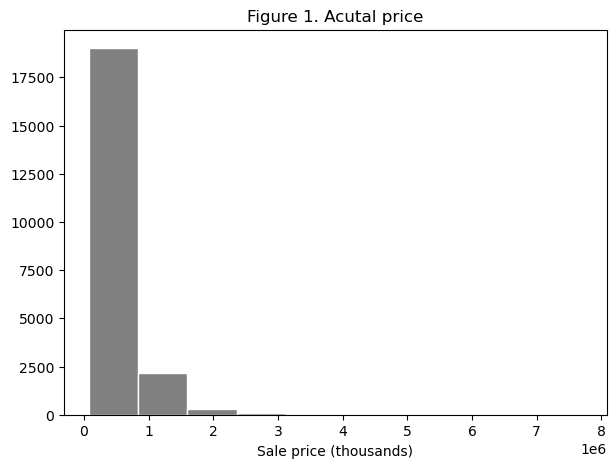

In [35]:
#import matplotlib and plot histogram of price
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
plt.title('Figure 1. Acutal price')
plt.hist(df['price'], color = 'gray', edgecolor = 'white')
plt.xlabel('Sale price (thousands)')

Q2. Develop a linear regression model for predicting the sale price in terms of the house features, leaving aside the zipcode.


In [36]:
#create X and y
y=df['price']
X=df.drop(columns = ['price', 'zipcode', 'date'])

In [37]:
#import and define linear regression 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [38]:
#fit linear regression model
lin_reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
# predict y using the linear regression model
y_pred = lin_reg.predict(X)

In [40]:
#score the model
round(lin_reg.score(X,y),3)

0.646

Q3. Plot the actual price versus the price predicted by the model. What do you see?


Text(0, 0.5, 'Actual price (thousands)')

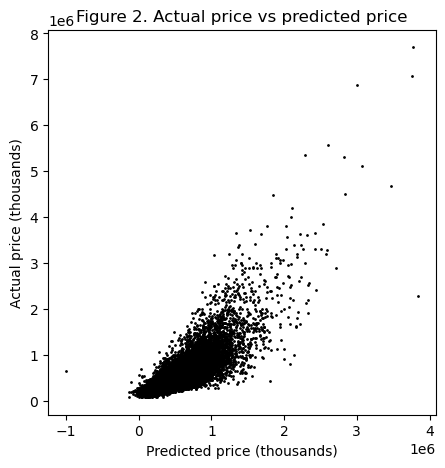

In [42]:

plt.figure(figsize=(5,5))
plt.title('Figure 2. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)')

In [43]:
#count the number of negative predictions
(y_pred < 0).sum()

np.int64(38)

Q4. Add a dummy for every zipcode to the feature collection and run the analysis again. Is this better?


In [44]:
#drop latitude and longitude from X leaving remaining features in X

X1= df.drop(columns  = ['date', 'zipcode', 'lat', 'long', 'price'])

In [45]:
#create dummy variables for zipcode and concatenate with X1 to create new X
X2 = pd.get_dummies(df['zipcode'])
X= pd.concat([X1,X2], axis=1)

In [20]:
X.shape

(21613, 80)

In [47]:
X = X.values

In [48]:
#fit new linear regression model with new X
lin_reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
#new predictions
y_pred = lin_reg.predict(X)

In [49]:
#New r-squared score
round(lin_reg.score(X,y),3)

0.785

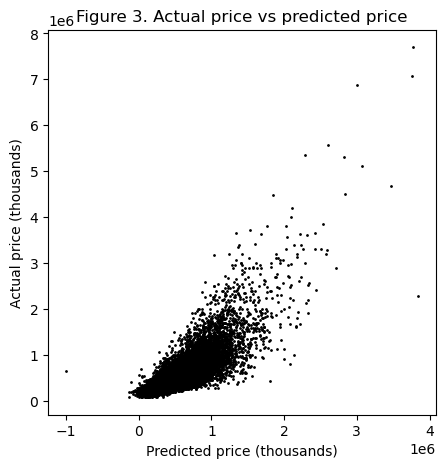

In [50]:
#new scatterplot
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

In [26]:
#check negative values
(y_pred < 0).sum()

np.int64(16)

Q5. Train a **decision tree model**, a **random forest model** and a **gradient boosting model**. What is the difference?


In [51]:
#importa and build decision tree regression model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 6)
tree_reg.fit(X,y)
round(tree_reg.score(X,y),3)

0.658

In [52]:
#import and build random forest regression model

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth = 6, n_estimators=100)
rf_reg.fit(X,y)
round(rf_reg.score(X,y),3)


0.701

In [53]:
#import and build xgboost regression model

from xgboost import XGBRegressor 
xgb_reg = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6)
xgb_reg.fit(X,y)
round(xgb_reg.score(X,y),3)

0.885

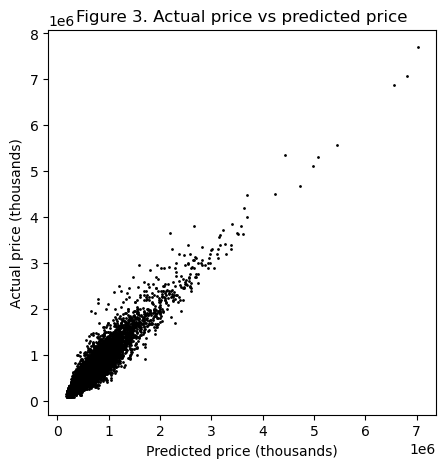

In [54]:
#plot XG regressor model 
y_pred = xgb_reg.predict(X)
plt.figure(figsize=(5,5))
plt.title('Figure 3. Actual price vs predicted price')
plt.scatter(x=y_pred, y=y, color='black', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)');

Q6. Validate the two most promising models, among those trained, using on a **train-test split**.


In [55]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [57]:
#fit linear regression model with training data and score on training and testing data
lin_reg.fit(X_train, y_train)
round(lin_reg.score(X_train, y_train),3), round(lin_reg.score(X_test, y_test),3)

(0.787, 0.777)

In [58]:

#fit XGBoost regressor with training data and score on training and testing data
xgb_reg.fit(X_train, y_train)
round(xgb_reg.score(X_train, y_train),3), round(xgb_reg.score(X_test, y_test),3)

(0.887, 0.802)

### Homework


1. The role of longitude and latitude in the prediction of real estate prices is unclear. Do they really contribute to get better predictions in the first model of this example? If we keep them in the second model, do we get a better model? 

2. Evaluate in dollar terms the predictive performance of the models presented in this example. For instance, you can use the mean (or median) absolute error. 

3. Is it better to use the percentage error in the above assessment?

4. Can the strong correlation obtained for the linear models of this example be an artifact created by the extreme values? Trim the data set, dropping the houses out a certain range of price and/or size. Do you get a better model?

5. How is the scatter plot for decision tree regressor? Can you explain the shape of the cloud of points obtained?

6. Try some variations on the number and the size of the trees in the ensemble models explored in this lecture. Can you improve their performance?

1. The role of longitude and latitude in the prediction of real estate prices is unclear. Do they really contribute to get better predictions in the first model of this example? If we keep them in the second model, do we get a better model? 

>  Latitude/longitude and zipcode are related, but not identical. Intuitively, it makes sense to have either one or the other, but maybe not both, so checking the model to see which is better makes sense. Potential combinations here might be:\
 
    - Features without lat/long and without zipcodes\
    - Features with lat/long and without zipcode\
    - Features without lat/long and with zipcode\
    - Features with lat/long and zipcode

In [63]:
#Re-create dataset X1, X2, and X, and refit with training data and score on training and testing data
# Model 1 - WITH lat/long (original Q2)
y = df['price']
X = df.drop(columns=['date', 'zipcode', 'price'])
lin_reg.fit(X, y)
print("Model 1/Q2: ", round(lin_reg.score(X, y), 3))

# Model 1 - WITHOUT lat/long
X_no_latlong = df.drop(columns=['date', 'zipcode', 'lat', 'long', 'price'])
lin_reg.fit(X_no_latlong, y)
print("Model 1 - WITHOUT lat/long: ", round(lin_reg.score(X_no_latlong, y), 3))


Model 1/Q2:  0.646
Model 1 - WITHOUT lat/long:  0.587


>The linear regression model underperforms without zipcode, latitude, and longitude vs with just zipcode. 

In [66]:
# Model 2 - WITHOUT lat/long (original Q4)
y = df['price']
X1 = df.drop(columns=['date', 'zipcode', 'lat', 'long', 'price'])
X2 = pd.get_dummies(df['zipcode'])
X = pd.concat([X1, X2], axis=1)
X.columns = X.columns.astype(str)
lin_reg.fit(X, y)
print("Model 2 - WITHOUT lat/long: ", round(lin_reg.score(X, y), 3))

# Model 2 - WITH lat/long
X1 = df.drop(columns=['date', 'zipcode', 'price'])
X2 = pd.get_dummies(df['zipcode'])
X = pd.concat([X1, X2], axis=1)
X.columns = X.columns.astype(str)
lin_reg.fit(X, y)
print("Model 2 - WITH lat/long: ", round(lin_reg.score(X, y), 3))

Model 2 - WITHOUT lat/long:  0.785
Model 2 - WITH lat/long:  0.786


>The presence (or absence) of lat/long combined with the presence of the dummy variables is only negligibly different. This indicates that the dummy variable operation is capturing most of what lat/long captures. 

2. Evaluate in dollar terms the predictive performance of the models presented in this example. For instance, you can use the mean (or median) absolute error. 


> Because the price is right-skewed with expensive outliers, we can expect that some outliers would affect the mean absolute value, so we'll use the median absolute error. 

In [67]:
# Redefine base variables
y = df['price']

# Model 1 - Linear regression with lat/long, no zipcodes
X_m1 = df.drop(columns=['date', 'zipcode', 'price'])
lin_reg.fit(X_m1, y)
y_pred_m1 = lin_reg.predict(X_m1)
residuals_m1 = y - y_pred_m1

# Model 2 - Linear regression with zipcode dummies, no lat/long
X1 = df.drop(columns=['date', 'zipcode', 'lat', 'long', 'price'])
X2 = pd.get_dummies(df['zipcode'])
X_m2 = pd.concat([X1, X2], axis=1)
X_m2.columns = X_m2.columns.astype(str)
lin_reg.fit(X_m2, y)
y_pred_m2 = lin_reg.predict(X_m2)
residuals_m2 = y - y_pred_m2

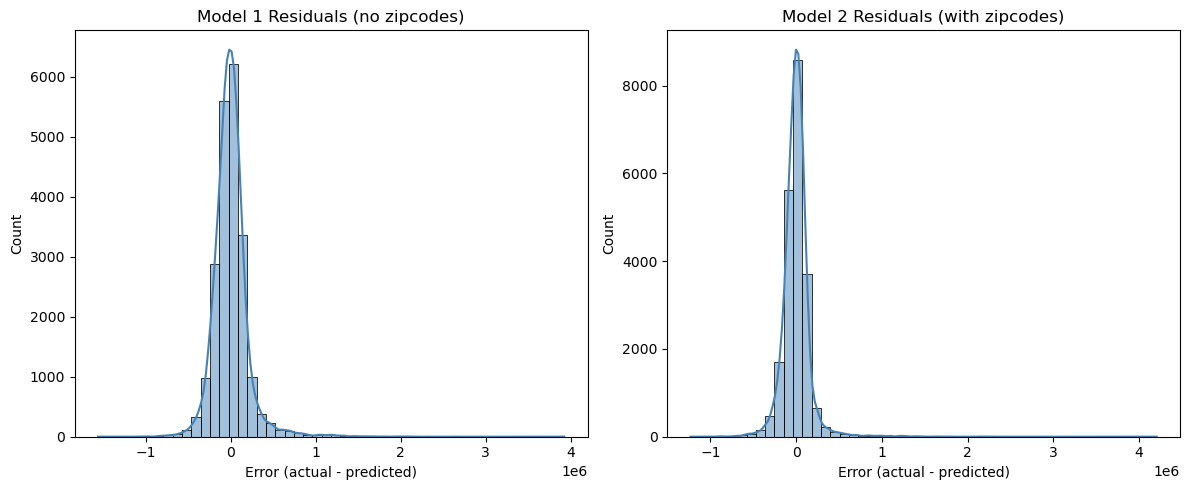

In [68]:
#import seaborn and plot residuals for both models
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(residuals_m1, bins=50, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Model 1 Residuals (no zipcodes)')
axes[0].set_xlabel('Error (actual - predicted)')

sns.histplot(residuals_m2, bins=50, kde=True, ax=axes[1], color='steelblue')
axes[1].set_title('Model 2 Residuals (with zipcodes)')
axes[1].set_xlabel('Error (actual - predicted)')

plt.tight_layout()
plt.show()


In [69]:
from sklearn.metrics import median_absolute_error

In [ ]:
# Calculate and print median absolute error for first two regression models
mdae_lr_m1 = median_absolute_error(y, y_pred_m1)
mdae_lr_m2 = median_absolute_error(y, y_pred_m2)
print("Median Absolute Error - Model 1 (no zipcodes): ", round(mdae_lr_m1, 3))
print("Median Absolute Error - Model 2 (with zipcodes): ", round(mdae_lr_m2, 3))

Median Absolute Error - Model 1 (no zipcodes):  97696.843
Median Absolute Error - Model 2 (with zipcodes):  70829.272


In [75]:
# Calculate and print mean absolute error for first two regression models
from sklearn.metrics import mean_absolute_error
mae_lr_m1 = mean_absolute_error(y, y_pred_m1)
mae_lr_m2 = mean_absolute_error(y, y_pred_m2)

print("Mean Absolute Error - Model 1 (no zipcodes): ", round(mae_lr_m1, 3))
print("Mean Absolute Error - Model 2 (with zipcodes): ", round(mae_lr_m2, 3))



Mean Absolute Error - Model 1 (no zipcodes):  139328.12
Mean Absolute Error - Model 2 (with zipcodes):  103082.703


> The residual plots for both linear regression models show right-skewed error distributions, with the majority of predictions clustering tightly around zero but a long tail of underpredicted high-value homes. Because of this skew, median absolute error is a more appropriate metric than mean absolute error — the mean is inflated by $32,000-$42,000 relative to the median due to outlier houses, making it unrepresentative of typical model performance.
In dollar terms, the zipcode model (Model 2) meaningfully outperforms the basic linear regression (Model 1), reducing the median absolute error from ~$97,700 to ~$70,800 — a improvement of roughly $27,000 in typical prediction accuracy.

In [85]:
# Recall DecisionTreeRegressor, RandomForrestRegressor, and XGBoostRegressor scores from above and define y_pred for each

# Train-test split
X_train_hw, X_test_hw, y_train_hw, y_test_hw = train_test_split(X_m2, y, test_size=0.2, random_state=42)

# Fit models on training data
tree_reg = DecisionTreeRegressor(max_depth=6)
tree_reg.fit(X_train_hw, y_train_hw)
y_pred_tree = tree_reg.predict(X_test_hw)

rf_reg = RandomForestRegressor(max_depth=6)
rf_reg.fit(X_train_hw, y_train_hw)
y_pred_rf = rf_reg.predict(X_test_hw)

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_hw, y_train_hw)
y_pred_xgb = xgb_reg.predict(X_test_hw)

In [87]:
#calculate the median and mean absolute error for each model

mdae_tree = median_absolute_error(y_test_hw, y_pred_tree)
mdae_rf = median_absolute_error(y_test_hw, y_pred_rf)
mdae_xgb = median_absolute_error(y_test_hw, y_pred_xgb)

mnae_tree = mean_absolute_error(y_test_hw, y_pred_tree)
mnae_rf = mean_absolute_error(y_test_hw, y_pred_rf)
mnae_xgb = mean_absolute_error(y_test_hw, y_pred_xgb)

print("Median Absolute Error - Decision Tree: ", round(mdae_tree, 3))
print("Median Absolute Error - Random Forest: ", round(mdae_rf, 3))
print("Median Absolute Error - XGBoost: ", round(mdae_xgb, 3))

print("Mean Absolute Error - Decision Tree: ", round(mnae_tree, 3))
print("Mean Absolute Error - Random Forest: ", round(mnae_rf, 3))
print("Mean Absolute Error - XGBoost: ", round(mnae_xgb, 3))

Median Absolute Error - Decision Tree:  109622.232
Median Absolute Error - Random Forest:  108672.448
Median Absolute Error - XGBoost:  49051.969
Mean Absolute Error - Decision Tree:  159091.554
Mean Absolute Error - Random Forest:  150366.601
Mean Absolute Error - XGBoost:  89853.586


>Although potentially overfit, XGBoost is the clear winner at $48,600 median absolute error, outperforming even the best linear regression model ($70,800). Decision tree and random forest underperform expectations, likely due to suboptimal parameters. Median is the appropriate metric given right-skewed residuals across all models.

3. Is it better to use the percentage error in the above assessment?


> Percentage error is useful for comparing model accuracy across houses of different price levels, since a fixed dollar error is more impactful on cheaper homes. However, for practical decision making — like whether a house fits your budget — absolute dollar error is more directly meaningful. Ideally both metrics are reported together for a complete picture.

